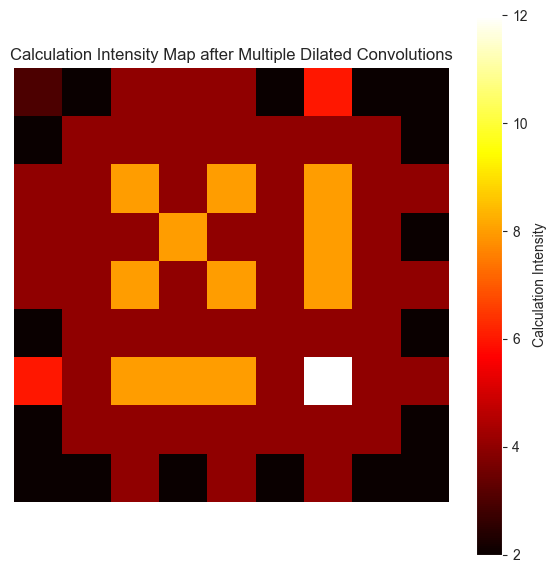

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 输入张量 7x7，值为1
input_tensor = np.ones((9, 9))

# 卷积核大小 2x2
kernel_size = 2

# 空洞率序列，用于模拟不同的空洞卷积
dilation_rates = [1, 2, 3]  # 可以根据需要调整

# 计算强度图，初始化为0
intensity_map = np.zeros_like(input_tensor)

# 定义一个卷积函数，计算每次卷积后每个位置的计算强度
def apply_dilated_convolution(input_tensor, kernel_size, dilation_rate):
    input_size = input_tensor.shape[0]
    output_size = (input_size - kernel_size) // dilation_rate + 1  # Adjust output size for dilation
    
    for i in range(output_size):
        for j in range(output_size):
            # Calculate the start and end indices for both i and j directions
            start_i = i * dilation_rate
            start_j = j * dilation_rate
            end_i = start_i + kernel_size * dilation_rate
            end_j = start_j + kernel_size * dilation_rate
            
            # Check to avoid out-of-bound indexing
            if end_i > input_size:
                end_i = input_size
            if end_j > input_size:
                end_j = input_size

            # Update the calculation intensity map
            intensity_map[start_i:end_i:dilation_rate, start_j:end_j:dilation_rate] += 1


# 应用不同空洞率进行卷积，更新计算强度
for dilation_rate in dilation_rates:
    apply_dilated_convolution(input_tensor, kernel_size, dilation_rate)

# 绘制计算强度图
plt.figure(figsize=(7, 7))
plt.imshow(intensity_map, cmap='hot', interpolation='nearest')
plt.colorbar(label='Calculation Intensity')
plt.title('Calculation Intensity Map after Multiple Dilated Convolutions')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [50]:
import numpy as np

def dilated_convolution(input_array, dilation_rate):
    # 获取输入矩阵的尺寸
    size = input_array.shape[0]
    
    # 计算输出矩阵的尺寸
    output_size = (size - 1) * dilation_rate + 1
    
    # 创建一个全零的输出矩阵
    output_array = np.zeros((output_size, output_size), dtype=int)

    # 填充输出矩阵
    for i in range(size):
        for j in range(size):
            # 根据空洞率将每个元素映射到多个位置
            output_array[i * dilation_rate, j * dilation_rate] = input_array[i, j]
    
    return output_array

# 初始输入矩阵
input_matrix = np.array([[1, 1], [1, 1]])

# 空洞率设置
dilation_rate = [1, 2, 3]

# 记录过程
steps = [input_matrix]

# 每次计算空洞卷积后的结果并保存
for i in range(len(dilation_rate)):  # 这里控制卷积的次数，1次卷积即可
    output_matrix = dilated_convolution(steps[-1], dilation_rate[i])
    steps.append(output_matrix)

# 打印过程
for step in steps:
    print(step)
    print()


[[1 1]
 [1 1]]

[[1 1]
 [1 1]]

[[1 0 1]
 [0 0 0]
 [1 0 1]]

[[1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1]]
